# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
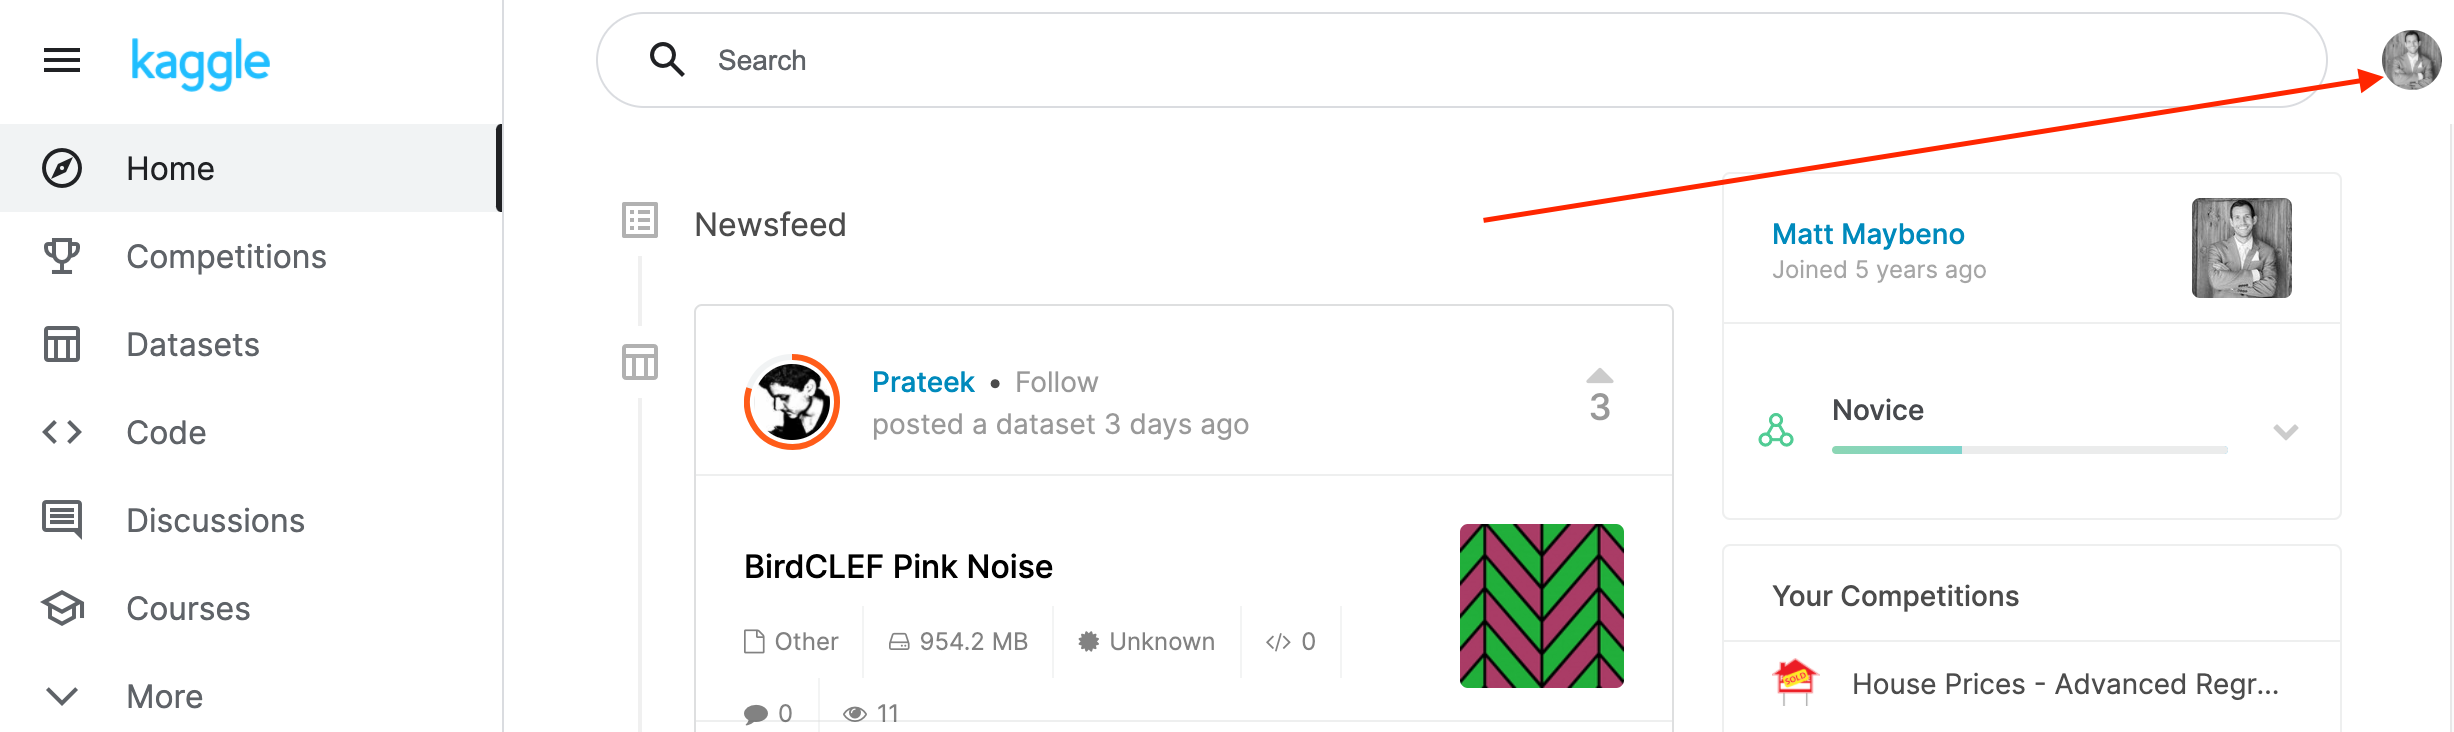
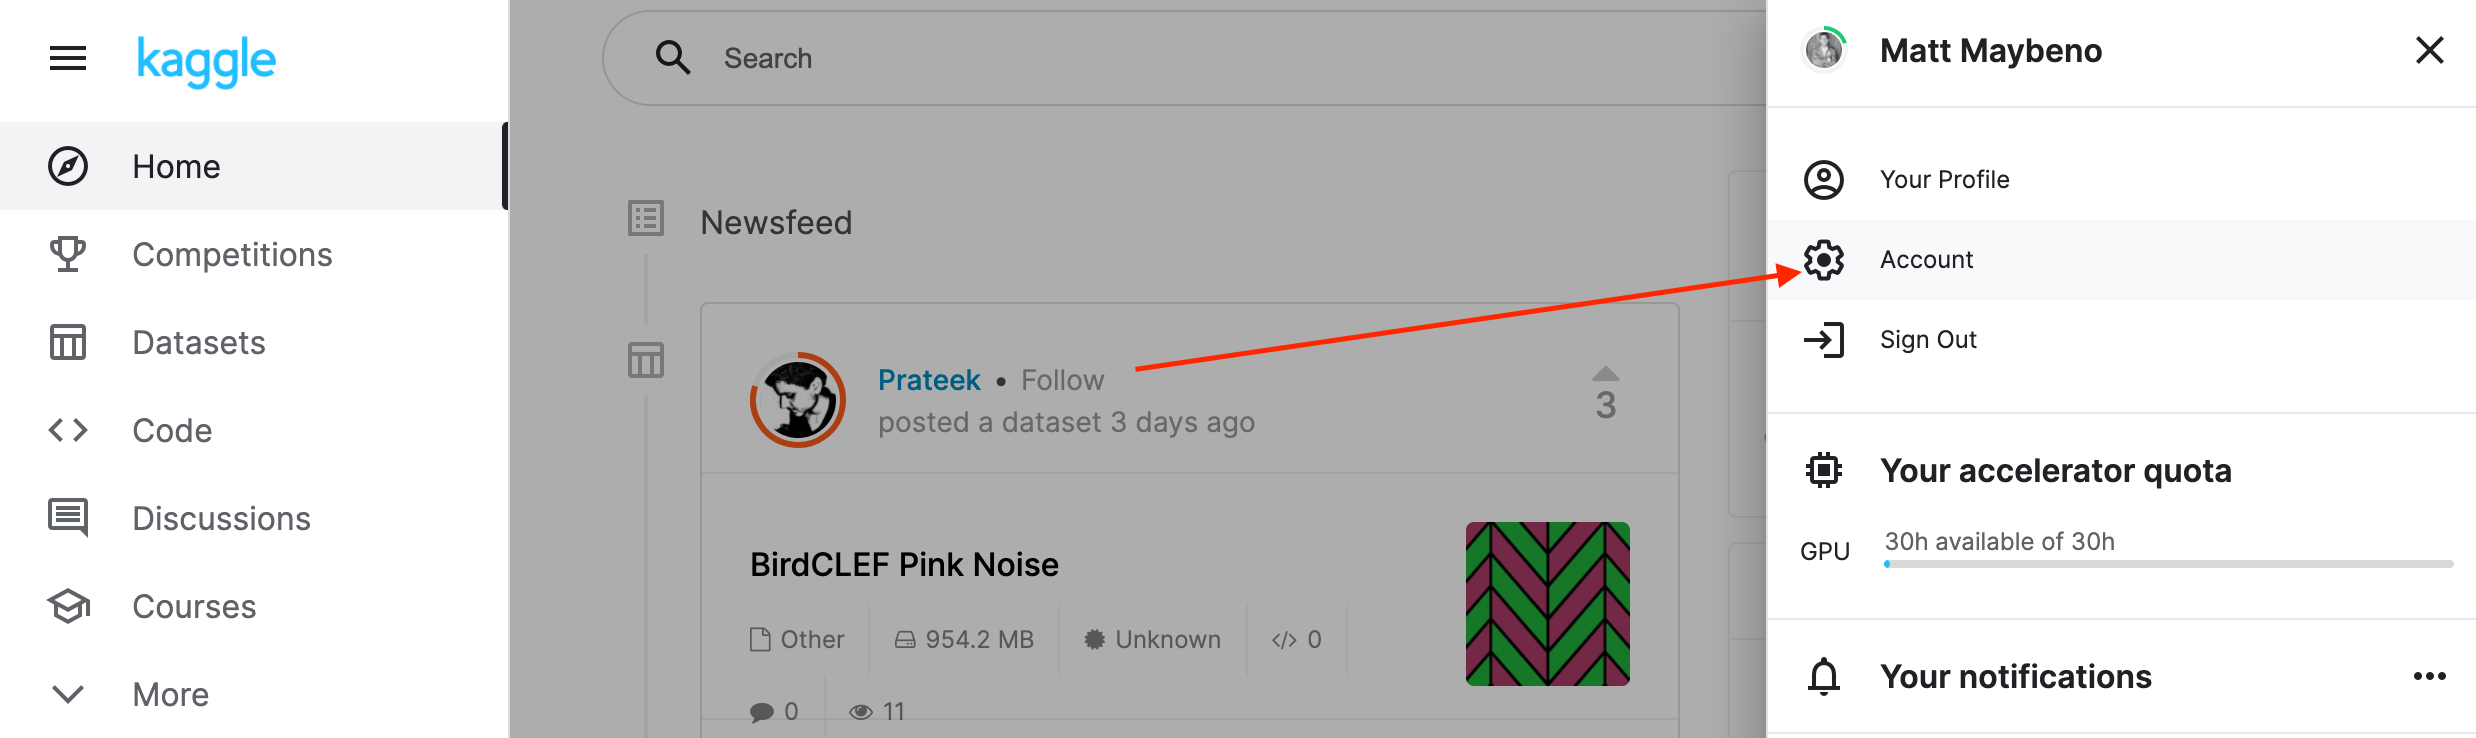
2. Scroll down to API and click Create New API Token.
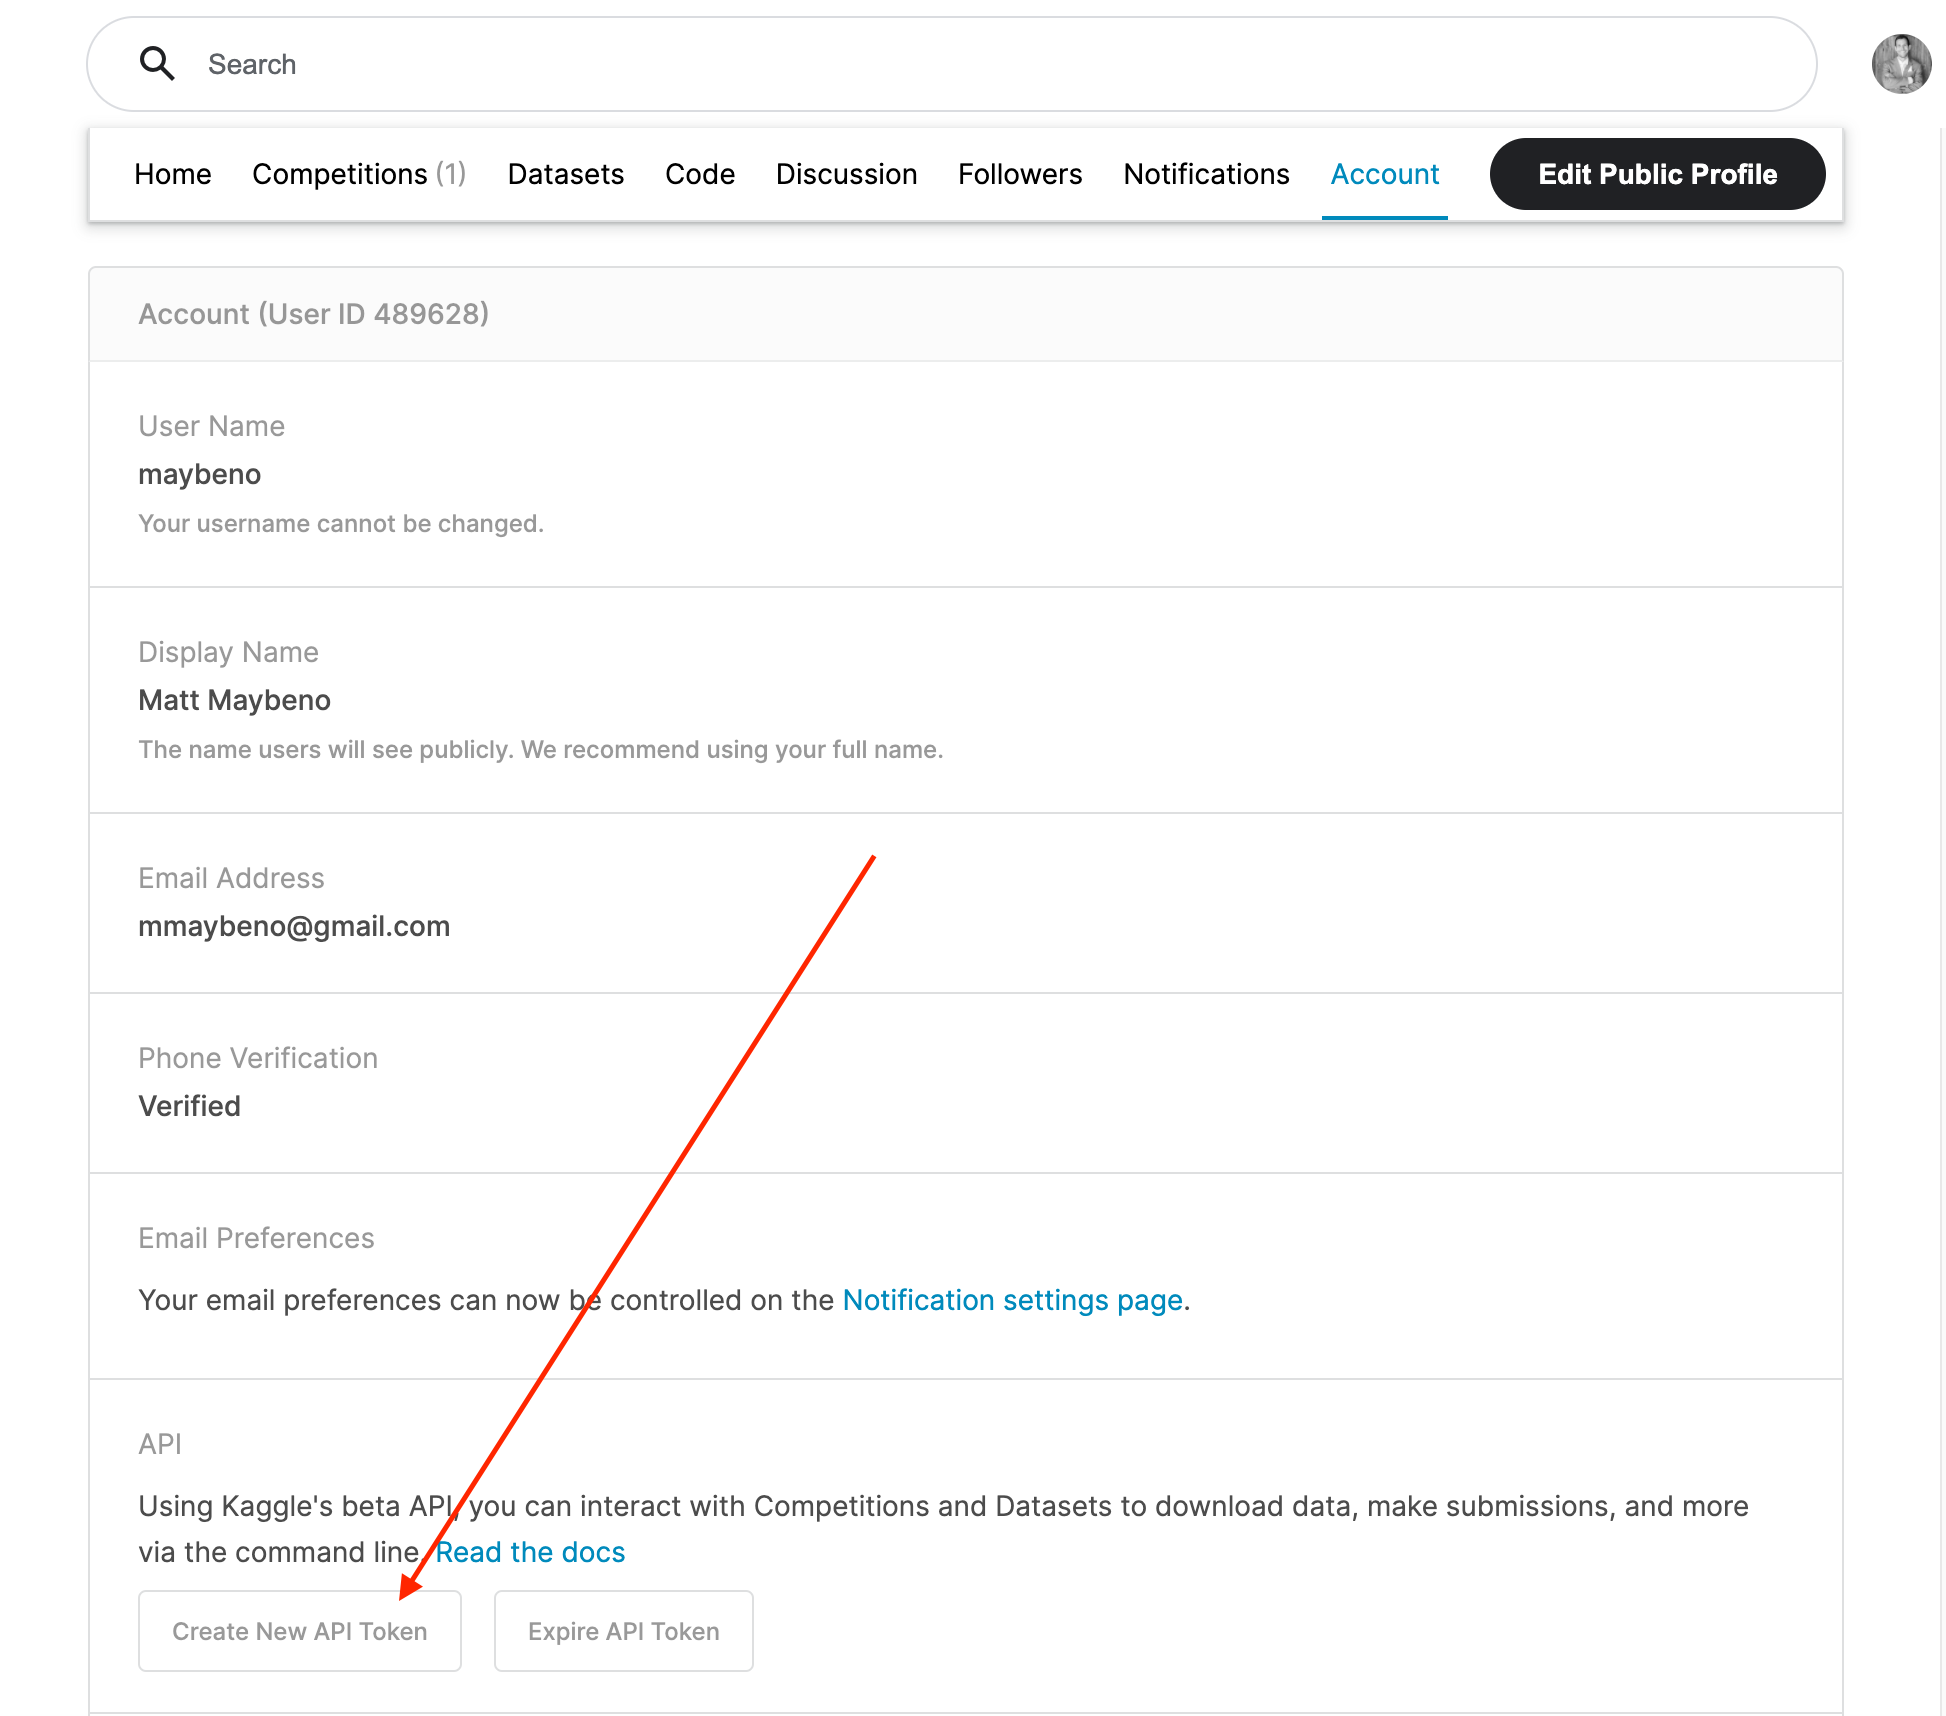
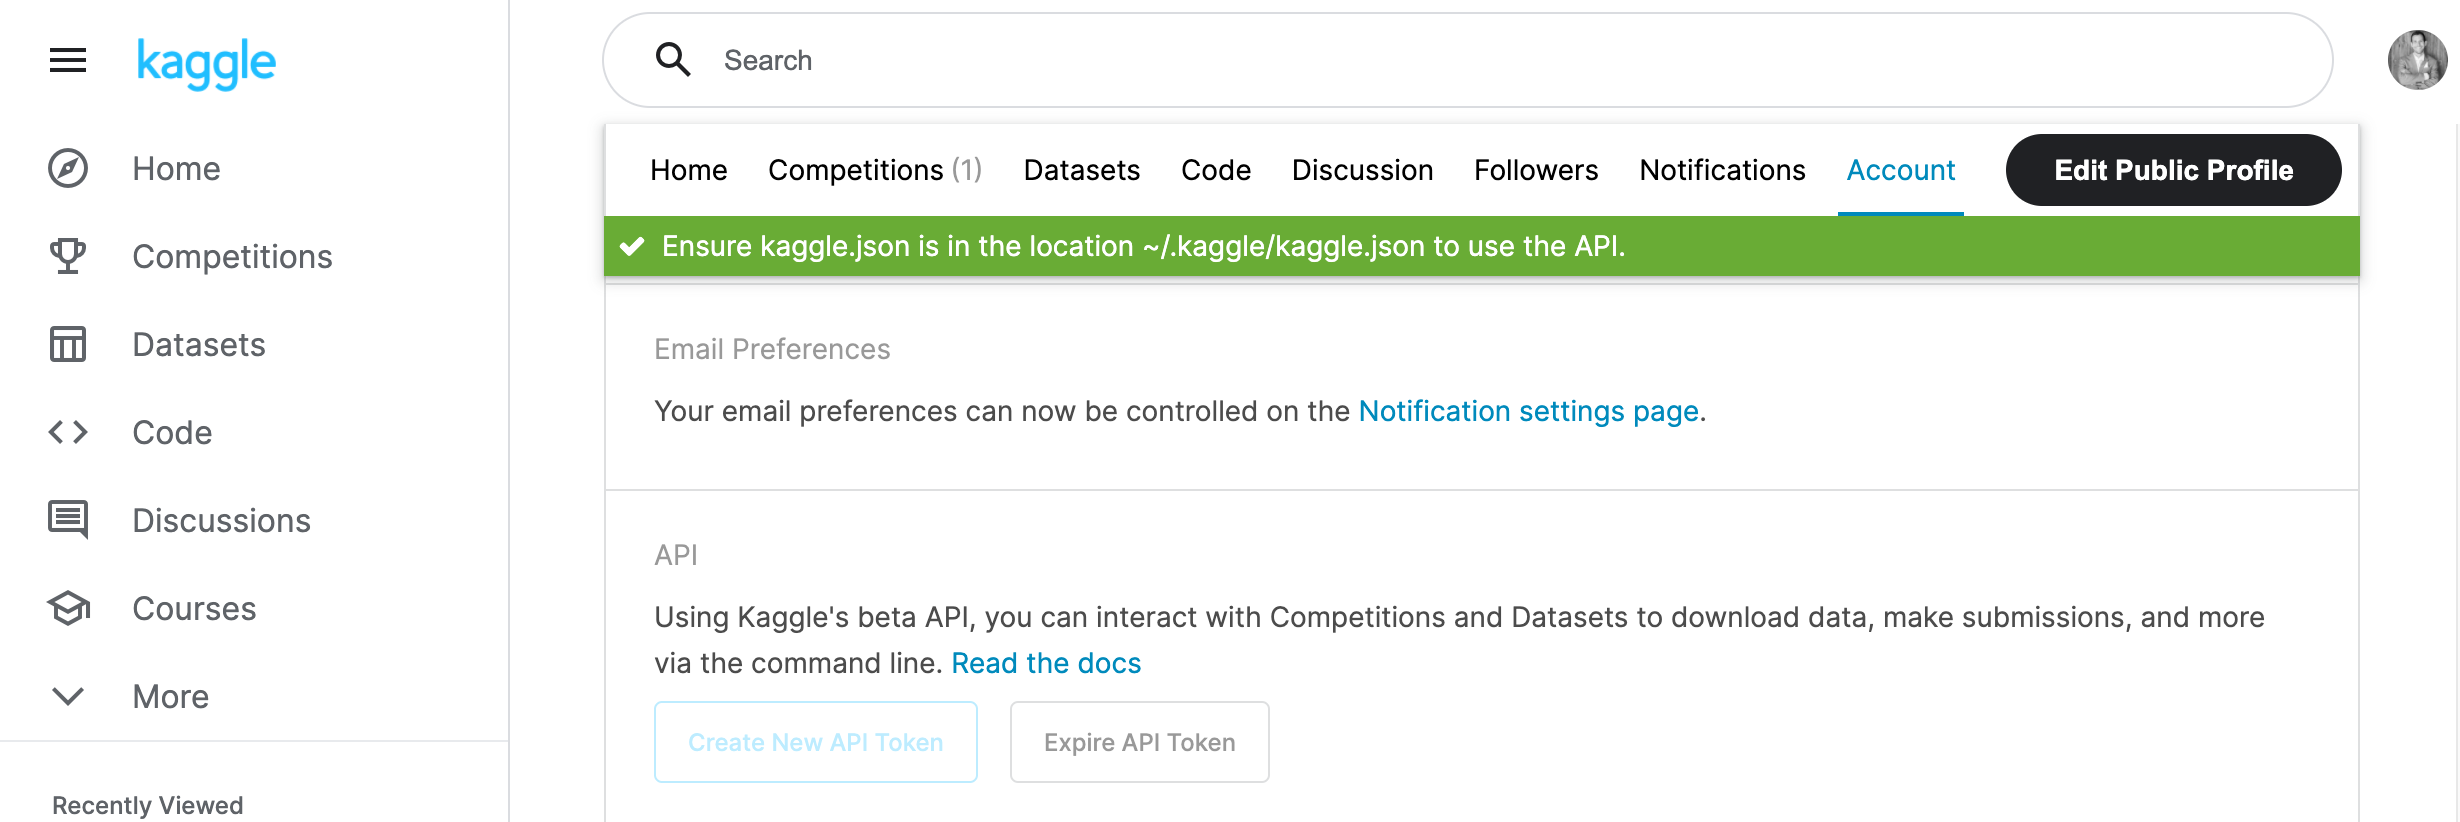
3. Open up `kaggle.json` and use the username and key.
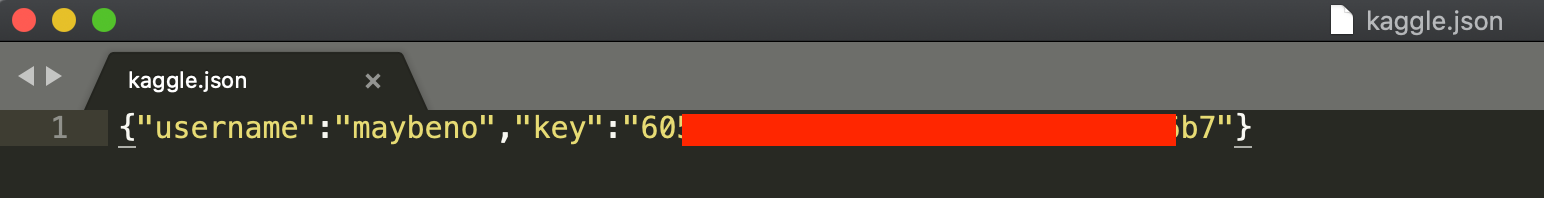

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install -q Kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 160.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 210.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "tchirima"
kaggle_key = "d5b418f7f88b763447fd33fd10a5f503"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Go to the bike sharing demand competition and agree to the terms
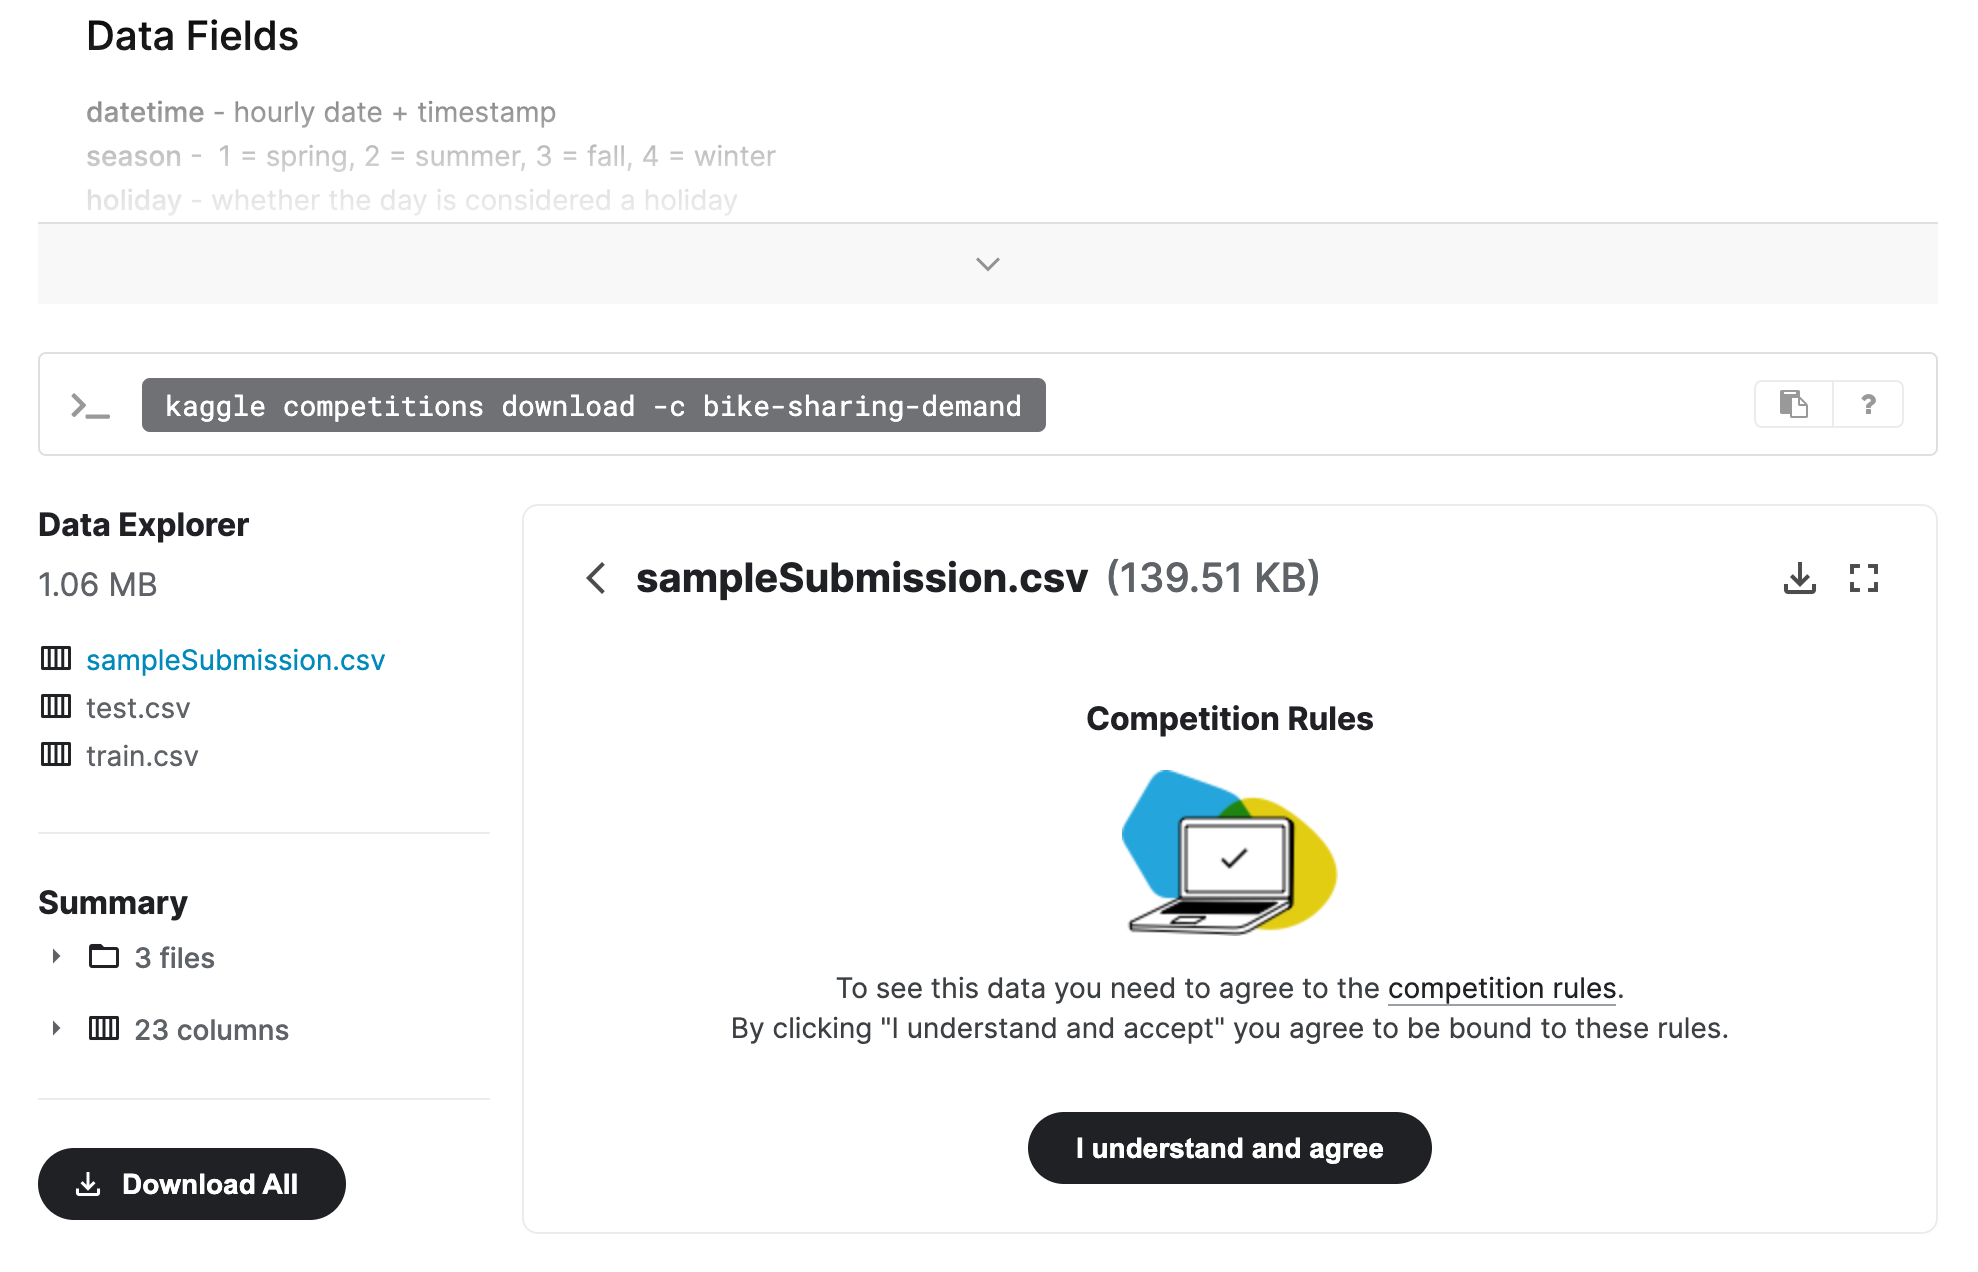

### Download and explore dataset

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import autogluon.core as ag
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
# Check for null values in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
# Check for null values in test data
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [57]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [58]:
# Variables not present in test dataset
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['casual', 'registered', 'count']

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [16]:
predictor = TabularPredictor(label="count",
                             problem_type='regression',
                             eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:,~train.columns.isin(['casual', 'registered'])], 
    time_limit=600, 
    presets="best_quality")


No path specified. Models will be saved in: "AutogluonModels/ag-20230531_080057/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_080057/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2996.5 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: 

### Review AutoGluon's training run with ranking of models that did the best.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.836370      11.295075  442.693094                0.000786           0.385666            3       True         15
1   RandomForestMSE_BAG_L2  -53.460279      10.444160  409.223823                0.596294          26.388892            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.796303      10.431290  391.190280                0.583424           8.355350            2       True         14
3          LightGBM_BAG_L2  -55.182674      10.114571  407.563186                0.266705          24.728255            2       True         11
4          CatBoost_BAG_L2  -55.817245       9.900464  446.265339                0.052598          63.430409            2       True         13
5        LightGBMXT_BAG_L2  -60.323801      12.766850  433.512912         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

0    23.777651
1    42.003220
2    45.647865
3    48.339783
4    51.453644
Name: count, dtype: float32

In [19]:
# Rank dataframe
df_rank = pd.DataFrame(predictor.leaderboard(silent=True))
df_rank

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-52.836370,11.295075,442.693094,0.000786,0.385666,3,True,15
1,RandomForestMSE_BAG_L2,-53.460279,10.444160,409.223823,0.596294,26.388892,2,True,12
2,ExtraTreesMSE_BAG_L2,-53.796303,10.431290,391.190280,0.583424,8.355350,2,True,14
3,LightGBM_BAG_L2,-55.182674,10.114571,407.563186,0.266705,24.728255,2,True,11
4,CatBoost_BAG_L2,-55.817245,9.900464,446.265339,0.052598,63.430409,2,True,13
5,LightGBMXT_BAG_L2,-60.323801,12.766850,433.512912,2.918984,50.677982,2,True,10
6,KNeighborsDist_BAG_L1,-84.125061,0.104038,0.031835,0.104038,0.031835,1,True,2
7,WeightedEnsemble_L2,-84.125061,0.105160,0.629535,0.001122,0.597701,2,True,9
8,KNeighborsUnif_BAG_L1,-101.546199,0.104017,0.037850,0.104017,0.037850,1,True,1
9,RandomForestMSE_BAG_L1,-116.544294,0.532111,10.744375,0.532111,10.744375,1,True,5


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.792191
std        90.486008
min         3.007851
25%        20.423416
50%        62.585213
75%       171.319656
max       365.028442
Name: count, dtype: float64

In [21]:
# How many negative values do we have?
negval = (predictions < 0).sum().sum()
negval

0

In [22]:
# Set them to zero
predictions[predictions < 0] = 0

#Recheck any negative values
re_negval = (predictions < 0).sum().sum()
re_negval

0

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 315kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-31 08:13:04  first raw submission  complete  1.81209      1.81209       
submission.csv  2023-05-30 10:35:47  first raw submission  complete  0.44765      0.44765       
submission.csv  2023-05-30 09:37:34  first raw submission  complete  4.64665      4.64665       


#### Initial score of 1.81209

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

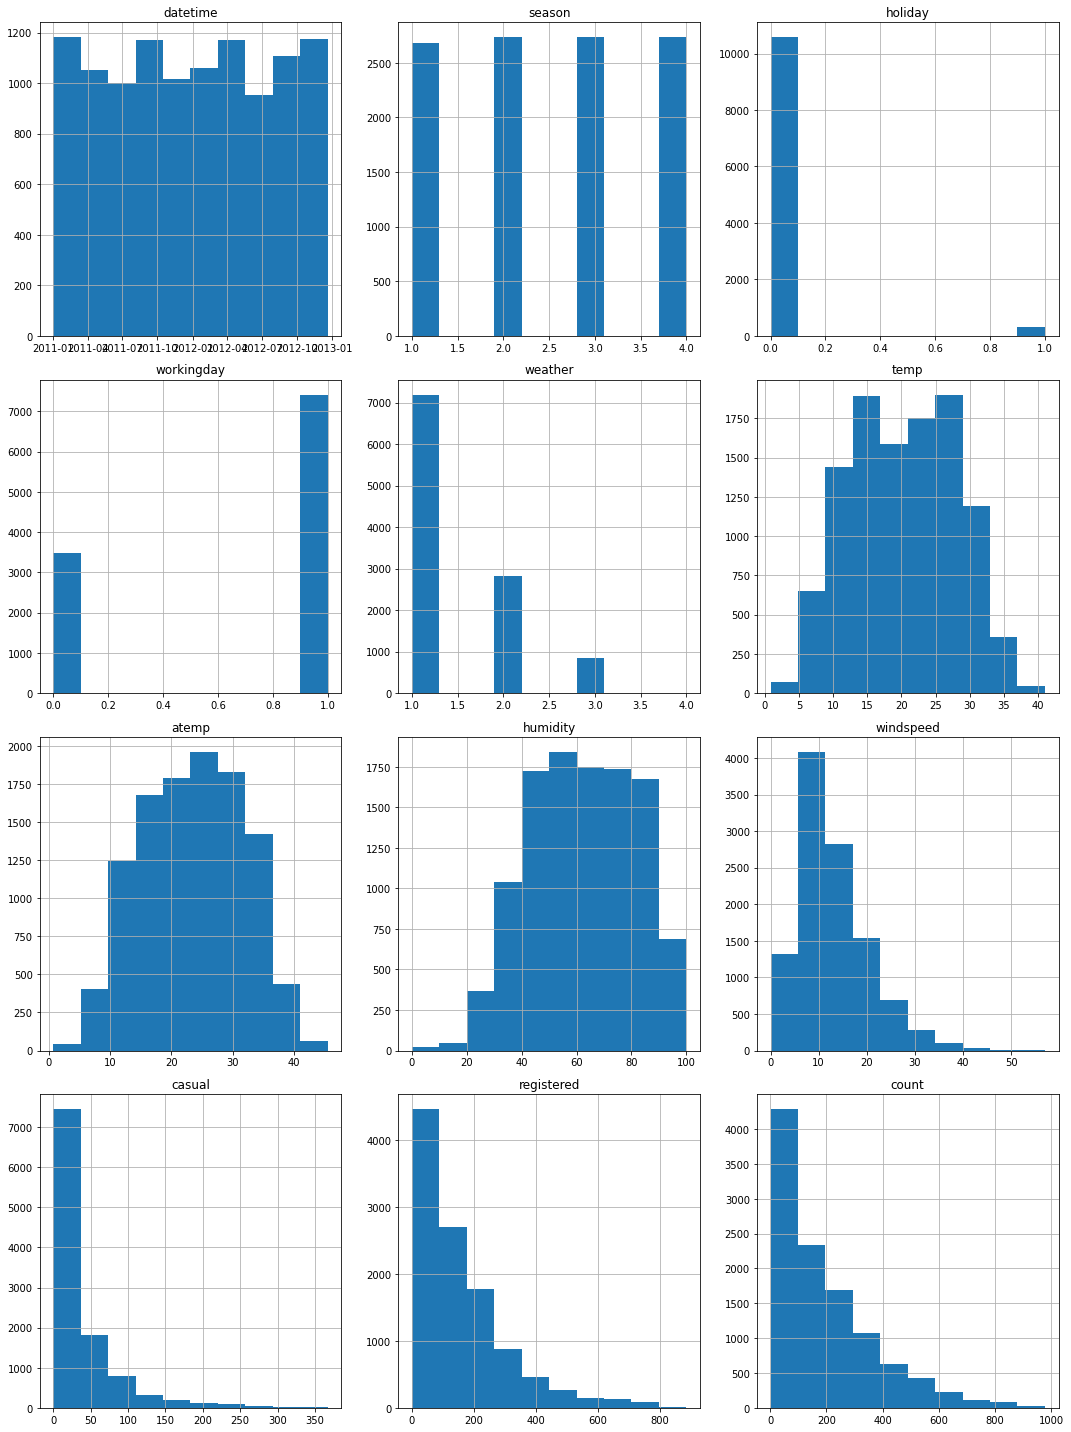

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

## Plot Heatmap

<Figure size 1800x1800 with 0 Axes>

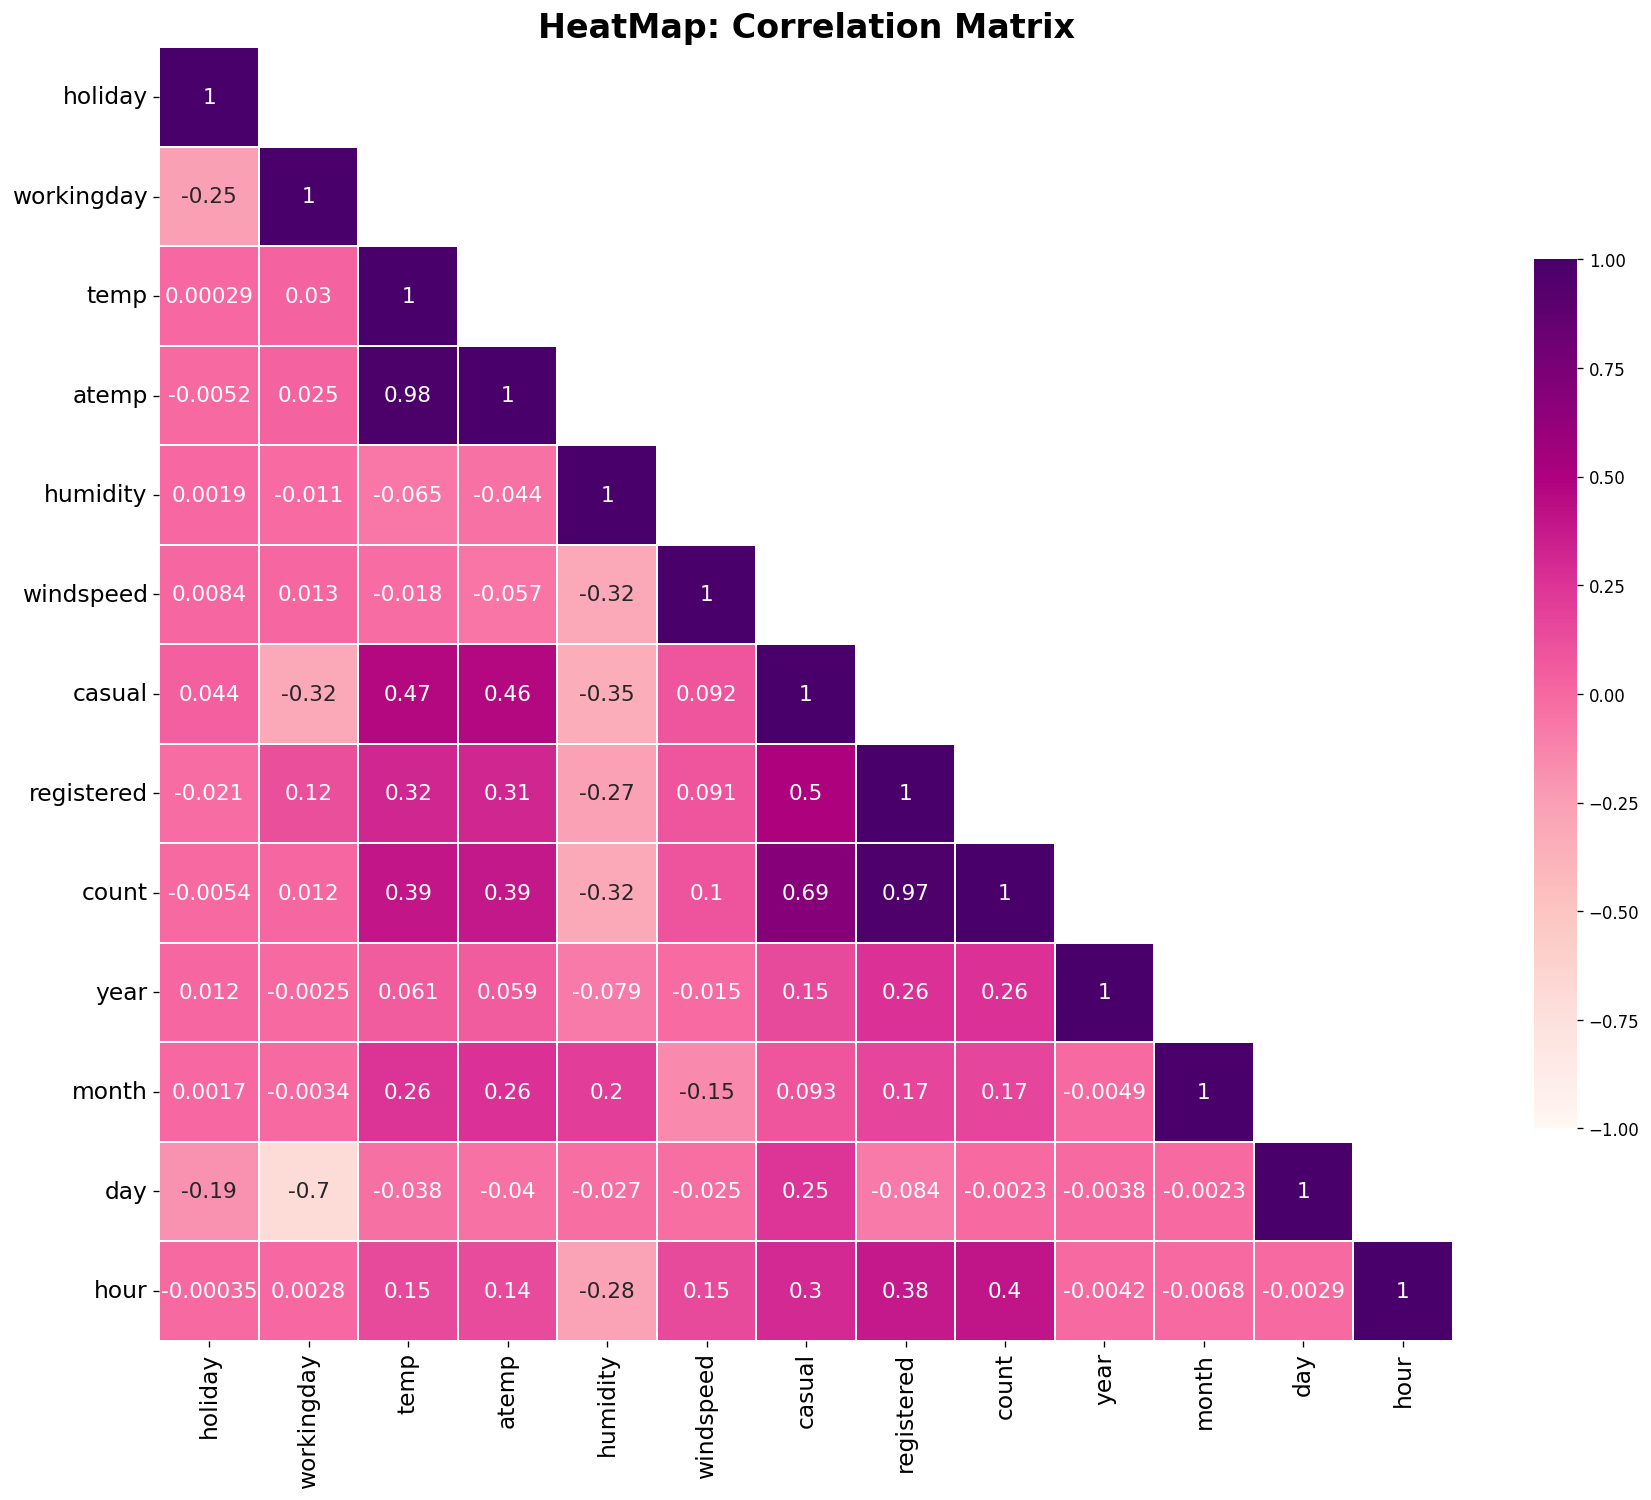

In [121]:

plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

In [27]:
# create a new feature
train['datetime'].head()
#test[?] = ?

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [28]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [29]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [31]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


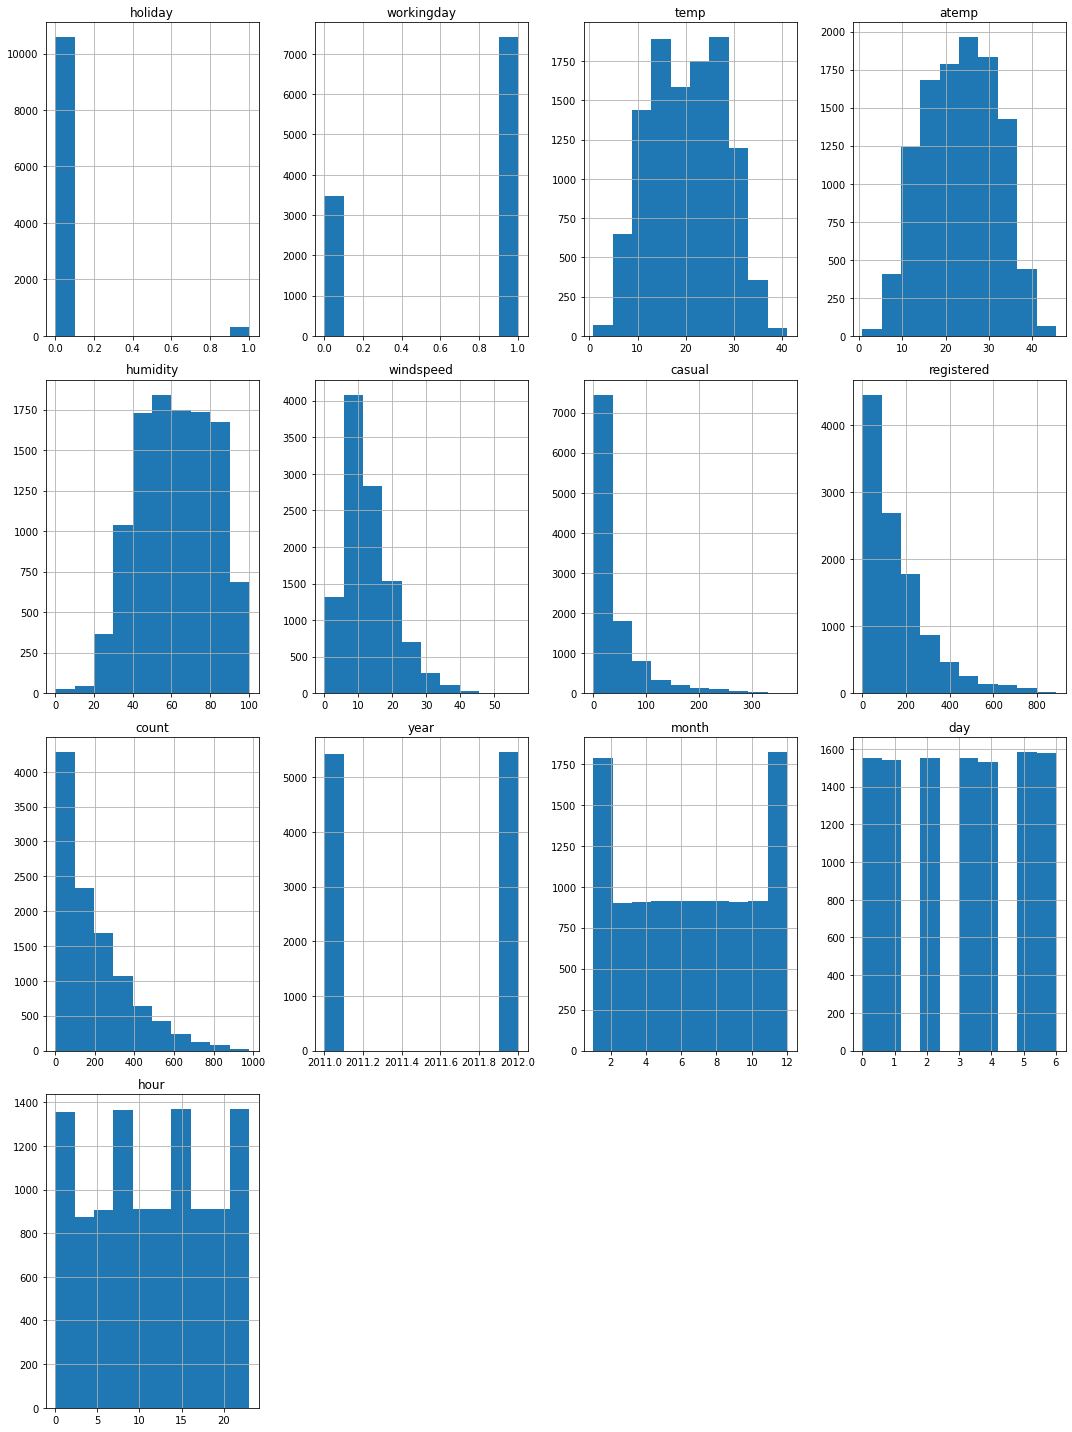

In [124]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

## Variation in target variable count with respect to new features derived from datetime feature

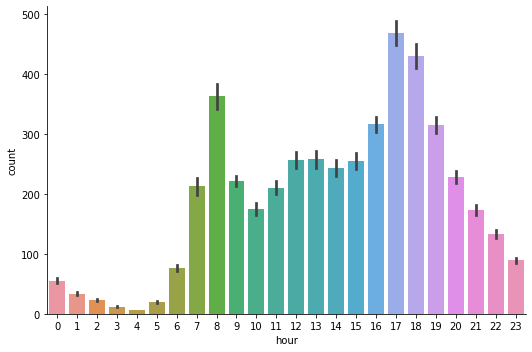

In [126]:
# Variation in`count` w.r.t `hour`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.show()

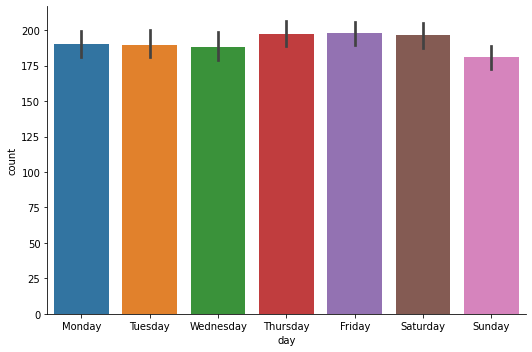

In [127]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5) 
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday", 
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

## Create new Day Type feature

In [125]:
# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


## Step 5: Rerun the model with the same settings as before, just with more features

In [128]:
predictor_new_features = TabularPredictor(label="count",
                             problem_type='regression',
                             eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:,~train.columns.isin(['casual', 'registered'])], 
    time_limit=600, 
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_112417/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_112417/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1881.08 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note:

In [129]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.923587      14.053993  526.527506                0.001236           0.451528            3       True         16
1     ExtraTreesMSE_BAG_L2  -34.148370      13.230319  407.731612                0.628981           8.365329            2       True         14
2      WeightedEnsemble_L2  -34.232338      11.700559  351.127963                0.001302           0.724905            2       True          9
3          CatBoost_BAG_L2  -34.321006      12.708454  461.588658                0.107116          62.222374            2       True         13
4          LightGBM_BAG_L2  -34.405943      12.748638  422.062704                0.147300          22.696420            2       True         11
5   RandomForestMSE_BAG_L2  -34.846806      13.217740  426.831791         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.1571124283534

In [130]:
# Rank dataframe
new_df_rank = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
new_df_rank

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-33.923587,14.053993,526.527506,0.001236,0.451528,3,True,16
1,ExtraTreesMSE_BAG_L2,-34.148370,13.230319,407.731612,0.628981,8.365329,2,True,14
2,WeightedEnsemble_L2,-34.232338,11.700559,351.127963,0.001302,0.724905,2,True,9
3,CatBoost_BAG_L2,-34.321006,12.708454,461.588658,0.107116,62.222374,2,True,13
4,LightGBM_BAG_L2,-34.405943,12.748638,422.062704,0.147300,22.696420,2,True,11
5,RandomForestMSE_BAG_L2,-34.846806,13.217740,426.831791,0.616402,27.465507,2,True,12
6,LightGBMXT_BAG_L2,-34.973407,12.990936,423.296642,0.389598,23.930359,2,True,10
7,LightGBM_BAG_L1,-35.796869,2.397251,36.181446,2.397251,36.181446,1,True,4
8,CatBoost_BAG_L1,-36.050925,0.195878,227.188682,0.195878,227.188682,1,True,6
9,LightGBMXT_BAG_L1,-36.458108,7.981647,72.507139,7.981647,72.507139,1,True,3


In [131]:
predictor_new_features = predictor_new_features.predict(test)
predictor_new_features.head()

0    11.431842
1     5.521758
2     3.578386
3     3.306819
4     3.238388
Name: count, dtype: float32

In [132]:
# Remember to set all negative values to zero
predictor_new_features[predictor_new_features < 0] = 0

#Recheck any negative values
new_negval = (predictor_new_features < 0).sum().sum()
new_negval

0

In [133]:
# Same submitting predictions
submission_new_features["count"] = predictor_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [134]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 403kB/s]
Successfully submitted to Bike Sharing Demand

In [135]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 11:36:19  new features                         complete  0.44368      0.44368       
submission_new_hpo2.csv      2023-05-31 10:34:15  new features with hyperparameters 2  complete  0.49885      0.49885       
submission_new_hpo1.csv      2023-05-31 10:32:52  new features with hyperparameters 2  complete  0.50773      0.50773       
submission_new_hpo1.csv      2023-05-31 10:21:29  new features with hyperparameters 1  complete  0.50773      0.50773       


#### New Score of 0.44368

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [136]:

## From autogluon documentation

nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

In [137]:
predictor_new_hpo = TabularPredictor(label="count",
                             problem_type='regression',
                             eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:,~train.columns.isin(['casual', 'registered'])], 
    time_limit=600, 
    presets="optimize_for_deployment",
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs,
    refit_full='best'
)

Fitted model: NeuralNetTorch/fab012c4 ...
	-114.0919	 = Validation score   (-root_mean_squared_error)
	4.13s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/fb8b028a ...
	-118.157	 = Validation score   (-root_mean_squared_error)
	5.14s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/fb931380 ...
	-74.942	 = Validation score   (-root_mean_squared_error)
	5.61s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetTorch/00b3132e ...
	-266.525	 = Validation score   (-root_mean_squared_error)
	6.03s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/01476254 ...
	-98.0971	 = Validation score   (-root_mean_squared_error)
	4.3s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/04388b28 ...
	-113.4795	 = Validation score   (-root_mean_squared_error)
	4.15s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/04ffbf40 ...
	-14

In [138]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -37.225176       1.920001  28.602678                0.000634           0.500340            2       True          5
1              LightGBM/T4 -37.677327       0.818588  10.184549                0.818588          10.184549            1       True          1
2              LightGBM/T6 -37.947112       0.316117   4.345338                0.316117           4.345338            1       True          2
3             LightGBM/T12 -37.952696       0.739787   8.001821                0.739787           8.001821            1       True          3
4  NeuralNetTorch/0f561d04 -55.995491       0.044874   5.570630                0.044874           5.570630            1       True          4
Number of models trained: 5
Types of models trained:
{'LGBModel', 'TabularNeuralNetTor

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'NeuralNetTorch/0f561d04': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -37.67732733802604,
  'LightGBM/T6': -37.94711185521868,
  'LightGBM/T12': -37.952696454026125,
  'NeuralNetTorch/0f561d04': -55.99549099775418,
  'WeightedEnsemble_L2': -37.225176173598335},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_113811/models/LightGBM/T4/',
  'LightGBM/T6': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_113811/models/LightGBM/T6/',
  'LightGBM/T12': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_113811/models/LightGBM/T12/',
  'NeuralNetTorch/0f561d04': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_113811/models/NeuralNetTorch/0f561d04/',
  'WeightedEnsemble_L2': 'Auto

In [139]:
# Rank dataframe
hpo_df_rank = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
hpo_df_rank

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.225176,1.920001,28.602678,0.000634,0.500340,2,True,5
1,LightGBM/T4,-37.677327,0.818588,10.184549,0.818588,10.184549,1,True,1
2,LightGBM/T6,-37.947112,0.316117,4.345338,0.316117,4.345338,1,True,2
3,LightGBM/T12,-37.952696,0.739787,8.001821,0.739787,8.001821,1,True,3
4,NeuralNetTorch/0f561d04,-55.995491,0.044874,5.570630,0.044874,5.570630,1,True,4


In [140]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.395817
1     2.657824
2     0.084458
3     1.566062
4     1.611603
Name: count, dtype: float32

In [141]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

#Recheck any negative values
hpo_negval = (predictions_new_hpo < 0).sum().sum()
hpo_negval

0

In [142]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [143]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [144]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 343kB/s]
Successfully submitted to Bike Sharing Demand

In [145]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 11:43:31  new features with hyperparameters    complete  0.54105      0.54105       
submission_new_features.csv  2023-05-31 11:36:19  new features                         complete  0.44368      0.44368       
submission_new_hpo2.csv      2023-05-31 10:34:15  new features with hyperparameters 2  complete  0.49885      0.49885       
submission_new_hpo1.csv      2023-05-31 10:32:52  new features with hyperparameters 2  complete  0.50773      0.50773       


#### New Score of 0.54105

## Step 6.1: Hyper parameter optimization

In [146]:
## From autogluon documentation: 

# Exclude ['NN_TORCH'] family of models due to poor performance prior
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT and XGB model types (as well as WeightedEnsembles since they have shown good results)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

In [147]:
predictor_new_hpo1 = TabularPredictor(label="count",
                             problem_type='regression',
                             eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:,~train.columns.isin(['casual', 'registered'])], 
    time_limit=600, 
    presets="optimize_for_deployment",
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs,
    excluded_model_types = excluded_model_types,
    refit_full='best'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_114447/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_114447/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1859.07 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	St

[1000]	valid_set's rmse: 38.7642
[2000]	valid_set's rmse: 38.4755


 10%|█         | 2/20 [00:06<00:49,  2.75s/it]

[1000]	valid_set's rmse: 39.1422


 15%|█▌        | 3/20 [00:08<00:46,  2.72s/it]

[1000]	valid_set's rmse: 39.2839
[2000]	valid_set's rmse: 38.1541
[3000]	valid_set's rmse: 37.8056
[4000]	valid_set's rmse: 37.6904


 25%|██▌       | 5/20 [00:23<01:15,  5.06s/it]

[1000]	valid_set's rmse: 38.0255


 40%|████      | 8/20 [00:33<00:41,  3.47s/it]

[1000]	valid_set's rmse: 38.9938
[2000]	valid_set's rmse: 38.2464
[3000]	valid_set's rmse: 38.1612
[4000]	valid_set's rmse: 38.1209
[5000]	valid_set's rmse: 38.1322


 50%|█████     | 10/20 [00:51<00:56,  5.67s/it]

[1000]	valid_set's rmse: 38.3396
[2000]	valid_set's rmse: 37.9308


 55%|█████▌    | 11/20 [00:57<00:53,  5.97s/it]

[1000]	valid_set's rmse: 38.9259
[2000]	valid_set's rmse: 38.032
[3000]	valid_set's rmse: 37.9782


 60%|██████    | 12/20 [01:07<00:57,  7.21s/it]

[1000]	valid_set's rmse: 38.6809
[2000]	valid_set's rmse: 38.4004


 65%|██████▌   | 13/20 [01:15<00:50,  7.23s/it]

[1000]	valid_set's rmse: 40.6768
[2000]	valid_set's rmse: 39.6332
[3000]	valid_set's rmse: 39.3135
[4000]	valid_set's rmse: 38.8986
[5000]	valid_set's rmse: 38.7691
[6000]	valid_set's rmse: 38.7416
[7000]	valid_set's rmse: 38.7278
[8000]	valid_set's rmse: 38.6749
[9000]	valid_set's rmse: 38.6609


 70%|███████   | 14/20 [01:25<00:49,  8.26s/it]

[1000]	valid_set's rmse: 43.5897
[2000]	valid_set's rmse: 41.1523
[3000]	valid_set's rmse: 40.546
[4000]	valid_set's rmse: 40.074
[5000]	valid_set's rmse: 39.7974
[6000]	valid_set's rmse: 39.5868
[7000]	valid_set's rmse: 39.5499
[8000]	valid_set's rmse: 39.4969
[9000]	valid_set's rmse: 39.3641
[10000]	valid_set's rmse: 39.2667


	Stopping HPO to satisfy time limit...
 70%|███████   | 14/20 [01:42<00:43,  7.29s/it]
Fitted model: LightGBM/T1 ...
	-38.4437	 = Validation score   (-root_mean_squared_error)
	3.59s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-38.7638	 = Validation score   (-root_mean_squared_error)
	1.34s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.0593	 = Validation score   (-root_mean_squared_error)
	2.19s	 = Training   runtime
	0.2s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-37.6773	 = Validation score   (-root_mean_squared_error)
	10.13s	 = Training   runtime
	0.88s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-38.3845	 = Validation score   (-root_mean_squared_error)
	1.88s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-37.9471	 = Validation score   (-root_mean_squared_error)
	4.37s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	

In [148]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.030532       2.607519  33.685256                0.000727           0.524136            2       True          7
1          LightGBM/T4 -37.677327       0.880929  10.134207                0.880929          10.134207            1       True          1
2          LightGBM/T6 -37.947112       0.336991   4.371816                0.336991           4.371816            1       True          2
3         LightGBM/T12 -37.952696       0.751103   8.123642                0.751103           8.123642            1       True          3
4           XGBoost/T8 -39.163008       0.047121   3.786598                0.047121           3.786598            1       True          6
5           XGBoost/T3 -39.497453       0.068489   2.680201                0.068489           2.680201        

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -37.67732733802604,
  'LightGBM/T6': -37.94711185521868,
  'LightGBM/T12': -37.952696454026125,
  'ExtraTreesMSE': -39.97586088707933,
  'XGBoost/T3': -39.49745346785416,
  'XGBoost/T8': -39.16300751369884,
  'WeightedEnsemble_L2': -37.03053218271284},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_114447/models/LightGBM/T4/',
  'LightGBM/T6': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_114447/models/LightGBM/T6/',
  'LightGBM/T12': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_114447/models/LightGBM/T12/',
  'ExtraTreesMSE': 'AutogluonModels/ag-20230531_114447/models/ExtraTre

In [149]:
# Rank dataframe
hpo1_df_rank = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
hpo1_df_rank

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.030532,2.607519,33.685256,0.000727,0.524136,2,True,7
1,LightGBM/T4,-37.677327,0.880929,10.134207,0.880929,10.134207,1,True,1
2,LightGBM/T6,-37.947112,0.336991,4.371816,0.336991,4.371816,1,True,2
3,LightGBM/T12,-37.952696,0.751103,8.123642,0.751103,8.123642,1,True,3
4,XGBoost/T8,-39.163008,0.047121,3.786598,0.047121,3.786598,1,True,6
5,XGBoost/T3,-39.497453,0.068489,2.680201,0.068489,2.680201,1,True,5
6,ExtraTreesMSE,-39.975861,0.522158,4.064656,0.522158,4.064656,1,True,4


In [150]:
hpo1_predictions = predictor_new_hpo1.predict(test)
hpo1_predictions.head()

0    17.677935
1     2.813133
2     0.627402
3     1.306993
4     1.236413
Name: count, dtype: float32

In [151]:
# Remember to set all negative values to zero
hpo1_predictions[hpo1_predictions < 0] = 0

#Recheck any negative values
hpo1_negval = (hpo1_predictions < 0).sum().sum()
hpo1_negval

0

In [152]:
# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [153]:
# Same submitting predictions
submission_new_hpo1["count"] = hpo1_predictions
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [154]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 352kB/s]
Successfully submitted to Bike Sharing Demand

In [156]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-05-31 11:51:03  new features with hyperparameters 1  complete  0.51103      0.51103       
submission_new_hpo.csv       2023-05-31 11:43:31  new features with hyperparameters    complete  0.54105      0.54105       
submission_new_features.csv  2023-05-31 11:36:19  new features                         complete  0.44368      0.44368       
submission_new_hpo2.csv      2023-05-31 10:34:15  new features with hyperparameters 2  complete  0.49885      0.49885       


#### New Score of 0.50773

## Step 6.2: Hyper parameter optimization

In [157]:
## From autogluon documentation

# Exclude ['NN_TORCH'] family of models due to poor performance prior
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)
# For GBM
gbm_opts = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_opts = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_opts = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]
# Random Forest Models
rf_opts = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# KNN
knn_opts = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_opts,
                   'KNN': knn_opts,
                   'XT': xt_opts,
                   'XGB': xgb_opts,
                   'RF': rf_opts
                  }  


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

In [158]:
predictor_new_hpo2 = TabularPredictor(label="count",
                             problem_type='regression',
                             eval_metric="root_mean_squared_error").fit(
    train_data=train.loc[:,~train.columns.isin(['casual', 'registered'])], 
    time_limit=600, 
    presets="optimize_for_deployment",
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs,
    excluded_model_types = excluded_model_types,
    refit_full='best'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_115220/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_115220/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1875.4 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Sta

[1000]	valid_set's rmse: 38.7642
[2000]	valid_set's rmse: 38.4755


 10%|█         | 2/20 [00:06<00:49,  2.76s/it]

[1000]	valid_set's rmse: 39.1422


 15%|█▌        | 3/20 [00:08<00:46,  2.71s/it]

[1000]	valid_set's rmse: 39.2839
[2000]	valid_set's rmse: 38.1541
[3000]	valid_set's rmse: 37.8056
[4000]	valid_set's rmse: 37.6904


 25%|██▌       | 5/20 [00:23<01:15,  5.01s/it]

[1000]	valid_set's rmse: 38.0255


 40%|████      | 8/20 [00:32<00:41,  3.46s/it]

[1000]	valid_set's rmse: 38.9938
[2000]	valid_set's rmse: 38.2464
[3000]	valid_set's rmse: 38.1612
[4000]	valid_set's rmse: 38.1209
[5000]	valid_set's rmse: 38.1322


 50%|█████     | 10/20 [00:50<00:55,  5.59s/it]

[1000]	valid_set's rmse: 38.3396
[2000]	valid_set's rmse: 37.9308


 55%|█████▌    | 11/20 [00:57<00:52,  5.87s/it]

[1000]	valid_set's rmse: 38.9259
[2000]	valid_set's rmse: 38.032


	Ran out of time, early stopping on iteration 2791. Best iteration is:
	[2764]	valid_set's rmse: 37.9527
	Stopping HPO to satisfy time limit...
 55%|█████▌    | 11/20 [01:05<00:53,  5.95s/it]
Fitted model: LightGBM/T1 ...
	-38.4437	 = Validation score   (-root_mean_squared_error)
	3.6s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-38.7638	 = Validation score   (-root_mean_squared_error)
	1.35s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.0593	 = Validation score   (-root_mean_squared_error)
	2.17s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-37.6773	 = Validation score   (-root_mean_squared_error)
	9.93s	 = Training   runtime
	0.81s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-38.3845	 = Validation score   (-root_mean_squared_error)
	1.9s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-37.9471	 = Validation score   (-root_mean_s

In [159]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.030532       2.444608  31.894291                0.000660           0.661754            2       True          7
1          LightGBM/T4 -37.677327       0.809438   9.932936                0.809438           9.932936            1       True          1
2          LightGBM/T6 -37.947112       0.323670   4.364582                0.323670           4.364582            1       True          2
3         LightGBM/T12 -37.952696       0.696100   6.516959                0.696100           6.516959            1       True          3
4           XGBoost/T8 -39.163008       0.047030   3.789829                0.047030           3.789829            1       True          6
5           XGBoost/T3 -39.497453       0.062995   2.651776                0.062995           2.651776        

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T8': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -37.67732733802604,
  'LightGBM/T6': -37.94711185521868,
  'LightGBM/T12': -37.952696454026125,
  'ExtraTreesMSE': -39.97586088707933,
  'XGBoost/T3': -39.49745346785416,
  'XGBoost/T8': -39.16300751369884,
  'WeightedEnsemble_L2': -37.03053218271284},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_115220/models/LightGBM/T4/',
  'LightGBM/T6': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_115220/models/LightGBM/T6/',
  'LightGBM/T12': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230531_115220/models/LightGBM/T12/',
  'ExtraTreesMSE': 'AutogluonModels/ag-20230531_115220/models/ExtraTre

In [160]:
# Rank dataframe
hpo2_df_rank = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
hpo2_df_rank

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.030532,2.444608,31.894291,0.000660,0.661754,2,True,7
1,LightGBM/T4,-37.677327,0.809438,9.932936,0.809438,9.932936,1,True,1
2,LightGBM/T6,-37.947112,0.323670,4.364582,0.323670,4.364582,1,True,2
3,LightGBM/T12,-37.952696,0.696100,6.516959,0.696100,6.516959,1,True,3
4,XGBoost/T8,-39.163008,0.047030,3.789829,0.047030,3.789829,1,True,6
5,XGBoost/T3,-39.497453,0.062995,2.651776,0.062995,2.651776,1,True,5
6,ExtraTreesMSE,-39.975861,0.504716,3.976456,0.504716,3.976456,1,True,4


In [161]:
hpo2_predictions = predictor_new_hpo2.predict(test)
hpo2_predictions.head()

0    17.677935
1     2.813133
2     0.627402
3     1.306993
4     1.236413
Name: count, dtype: float32

In [162]:
# Remember to set all negative values to zero
hpo2_predictions[hpo2_predictions < 0] = 0

#Recheck any negative values
hpo2_negval = (hpo2_predictions < 0).sum().sum()
hpo2_negval

0

In [163]:
# Same thing as train and test dataset
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [164]:
# Same submitting predictions
submission_new_hpo2["count"] = hpo2_predictions
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [165]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 468kB/s]
Successfully submitted to Bike Sharing Demand

In [109]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-05-31 10:34:15  new features with hyperparameters 2  complete  0.49885      0.49885       
submission_new_hpo1.csv      2023-05-31 10:32:52  new features with hyperparameters 2  complete  0.50773      0.50773       
submission_new_hpo1.csv      2023-05-31 10:21:29  new features with hyperparameters 1  complete  0.50773      0.50773       
submission_new_hpo.csv       2023-05-31 09:12:00  new features with hyperparameters    complete  0.54884      0.54884       


#### New Score of 0.49885

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

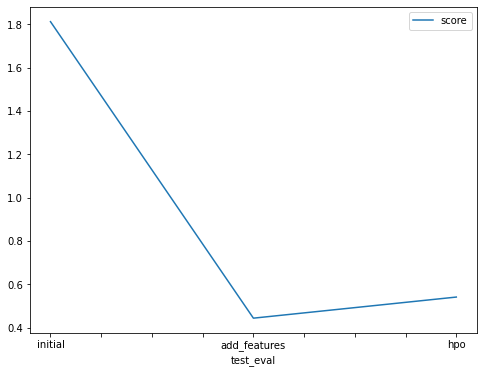

In [169]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.81209, 0.44368, 0.54105]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

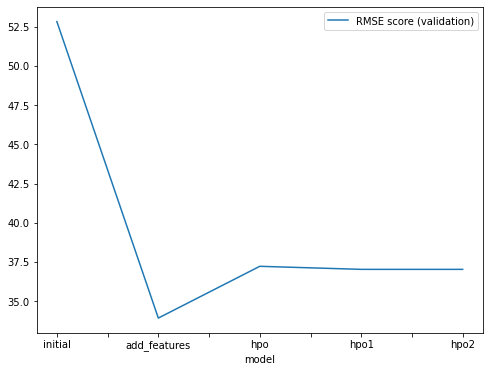

In [168]:
# Taking the top model score from each training run and creating a line plot to show improvement

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1", "hpo2"], 
        "RMSE score (validation)": [52.8364, 33.9236, 37.2252, 37.0305, 37.0305]  # NB: Actual RMSE values used
    }
).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

### Hyperparameter table

In [170]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.81209,  0.44368, 0.49885]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),1.81209
1,add_features,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),0.44368
2,hpo (top-hpo-model: hpo2),"Tree-Based Models: (GBM, XT, XGB & RF)",KNN,presets: 'optimize_for_deployment,0.49885
